In [109]:
#Assignment 4

In [110]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

In [111]:
#Importing cancer dataset from local directory

file_path1 = 'C:/Users/nicocorb/Downloads/ECGR4105/cancer.csv'
df_cancer = pd.read_csv(file_path1)

In [112]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [114]:
#Importing housing dataset from local directory

file_path2 = 'C:/Users/nicocorb/Downloads/ECGR4105/Housing.csv'
df_housing = pd.read_csv(file_path2)

In [115]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [116]:
df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [117]:
#Defining necessary functions for problem 1

#Train, Test and Split Function
def tts(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

#Standardize Function
def standardize(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

#K Components Loop Function
def k_components(max_k, X_scaled, y, N):
    accuracy_results = {kernel: [] for kernel in ['linear', 'poly', 'rbf', 'sigmoid']}
    precision_results = {kernel: [] for kernel in ['linear', 'poly', 'rbf', 'sigmoid']}
    recall_results = {kernel: [] for kernel in ['linear', 'poly', 'rbf', 'sigmoid']}

    for k in range(1, max_k + 1):
        pca = PCA(n_components=k)
        X_pca = pca.fit_transform(X_scaled)
        
        for kernel in accuracy_results.keys():
            accuracy, precision, recall = [], [], []
            
            for _ in range(N):
                X_train, X_test, y_train, y_test = tts(X_pca, y)
                
                svm = SVC(kernel=kernel, random_state=None)
                svm.fit(X_train, y_train)
                y_predicted = svm.predict(X_test)
                
                accuracy.append(accuracy_score(y_test, y_predicted))
                precision.append(precision_score(y_test, y_predicted))
                recall.append(recall_score(y_test, y_predicted))

            accuracy_results[kernel].append(np.mean(accuracy))
            precision_results[kernel].append(np.mean(precision))
            recall_results[kernel].append(np.mean(recall))
    return accuracy_results, precision_results, recall_results

#Plotting
def plot_results(max_k, accuracy_results, precision_results, recall_results):
    components = list(range(1, max_k + 1))

    plt.figure(figsize=(16, 10))
    for kernel in accuracy_results.keys():
        plt.plot(components, accuracy_results[kernel], label=f'{kernel} kernel')
    plt.title('SVM Classification Accuracy vs Number of PCA Components')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Precision plot
    plt.figure(figsize=(16, 10))
    for kernel in precision_results.keys():
        plt.plot(components, precision_results[kernel], label=f'{kernel} kernel')
    plt.title('Precision vs Number of PCA Components')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    # Recall plot
    plt.figure(figsize=(16, 10))
    for kernel in recall_results.keys():
        plt.plot(components, recall_results[kernel], label=f'{kernel} kernel')
    plt.title('Recall vs Number of PCA Components')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

In [118]:
#Problem 1

#Dataset adjustment for input and output values
X = df_cancer.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)
y = df_cancer['diagnosis'].map({'M': 1, 'B': 0})

In [119]:
#Retreiving standardized version of X
X_scaled = standardize(X)

In [120]:
#Setting max_k value and number of independent runs
max_k = X.shape[1]
N = 5

In [121]:
accuracy_results, precision_results, recall_results = k_components(max_k, X_scaled, y, N)

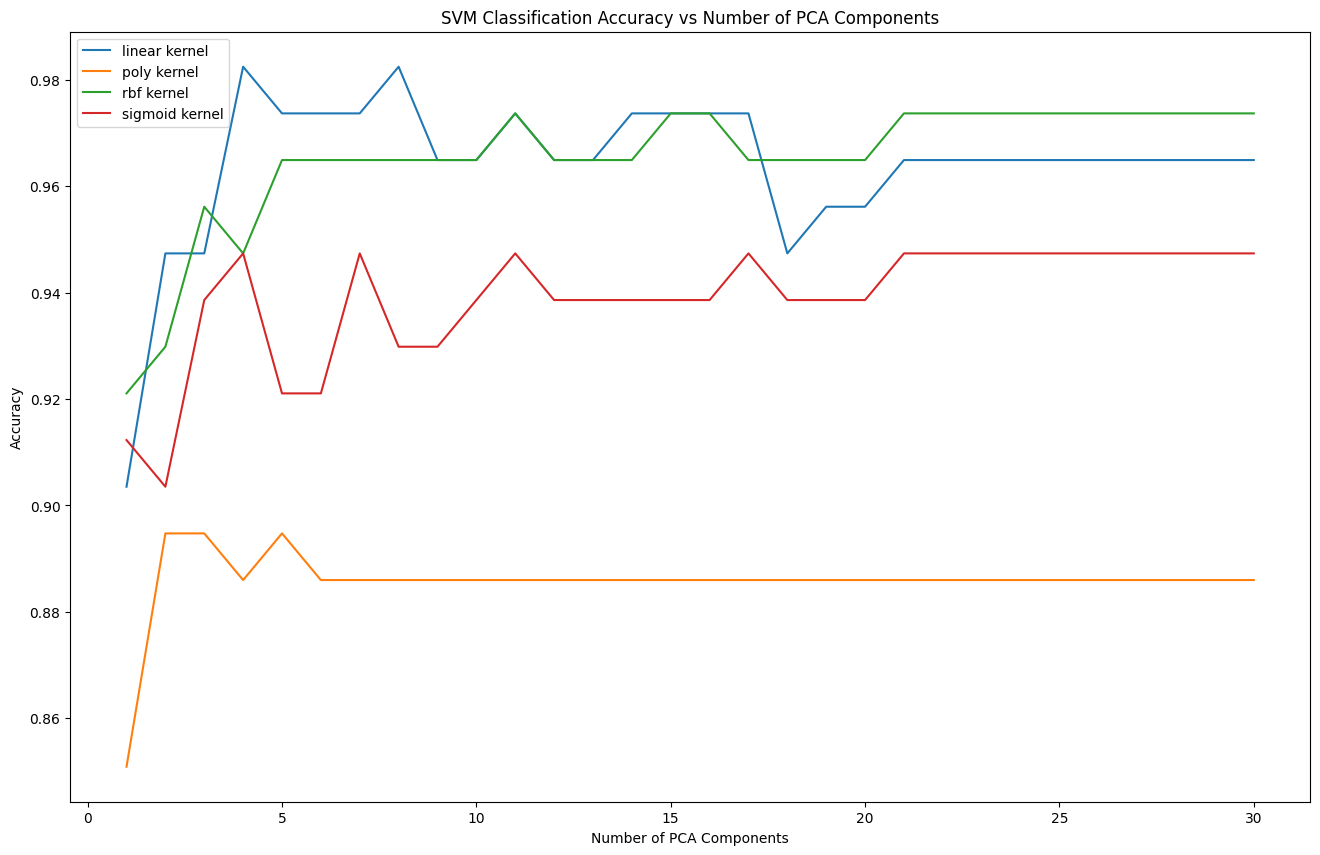

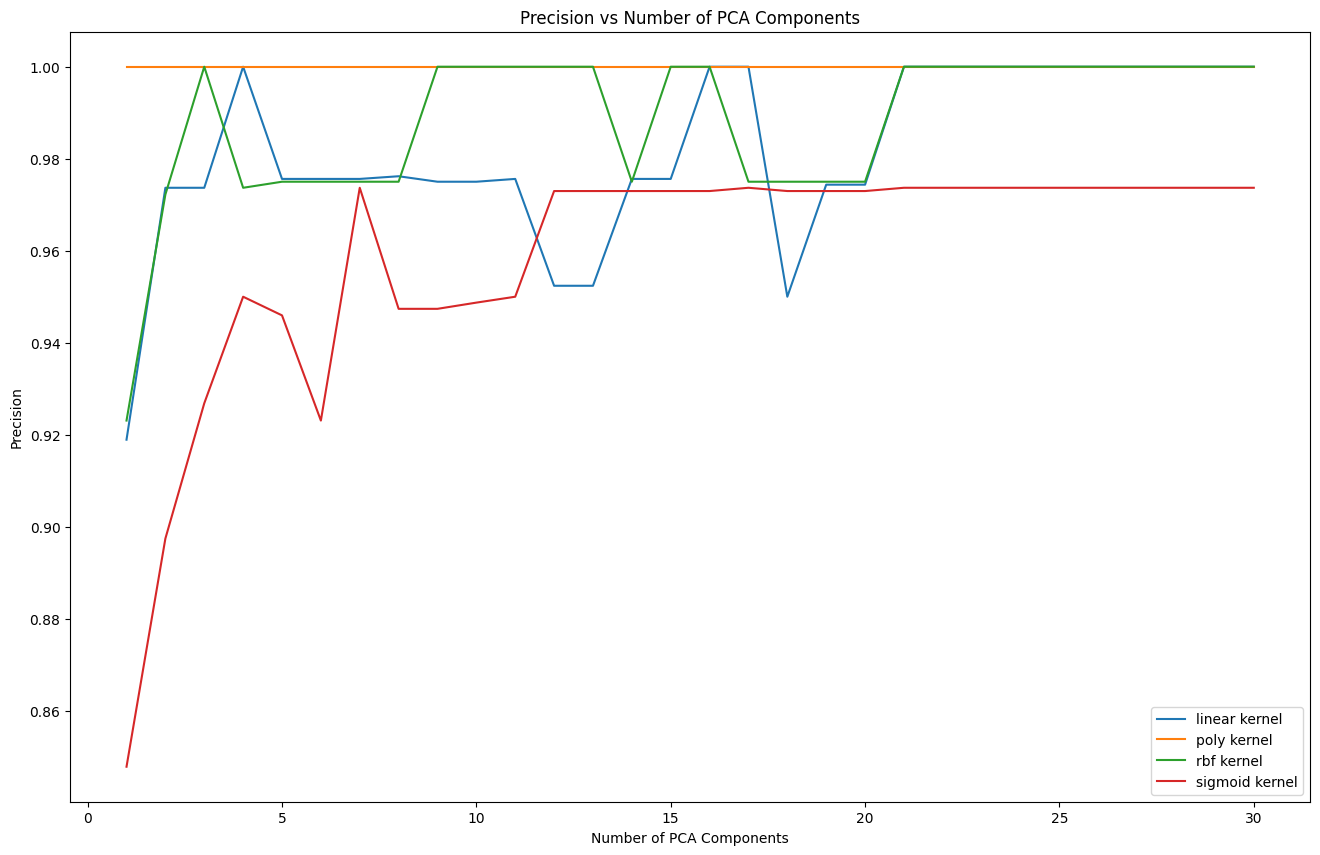

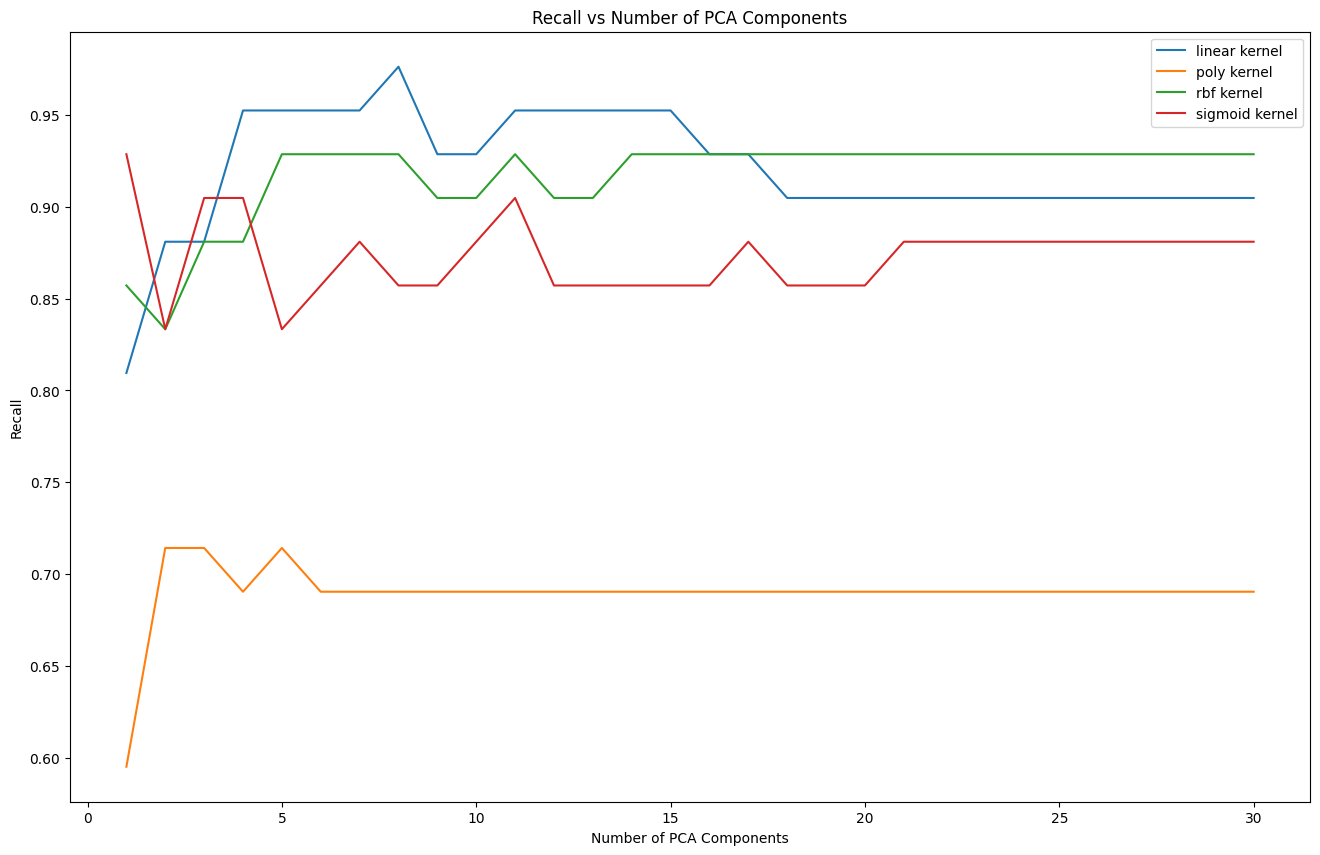

In [122]:
plot_results(max_k, accuracy_results, precision_results, recall_results)

In [144]:
#Defining necessary functions for problem 2

def standardize_housing(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()
    return X_scaled, y_scaled

In [145]:
#Setting features and target 

X_housing = df_housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].copy()
X_housing = pd.get_dummies(X_housing, drop_first=True)

y_housing = df_housing['price']

In [146]:
#Standardizing features

Xh_scaled, yh_scaled = standardize_housing(X_housing, y_housing)


In [147]:
#Setting max number of PCA components and number of indpendent runs

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=4)
y_rbf = svr_rbf.fit(Xh_scaled, yh_scaled).predict(Xh_scaled)
y_lin = svr_lin.fit(Xh_scaled, yh_scaled).predict(Xh_scaled)
y_poly = svr_poly.fit(Xh_scaled, yh_scaled).predict(Xh_scaled)

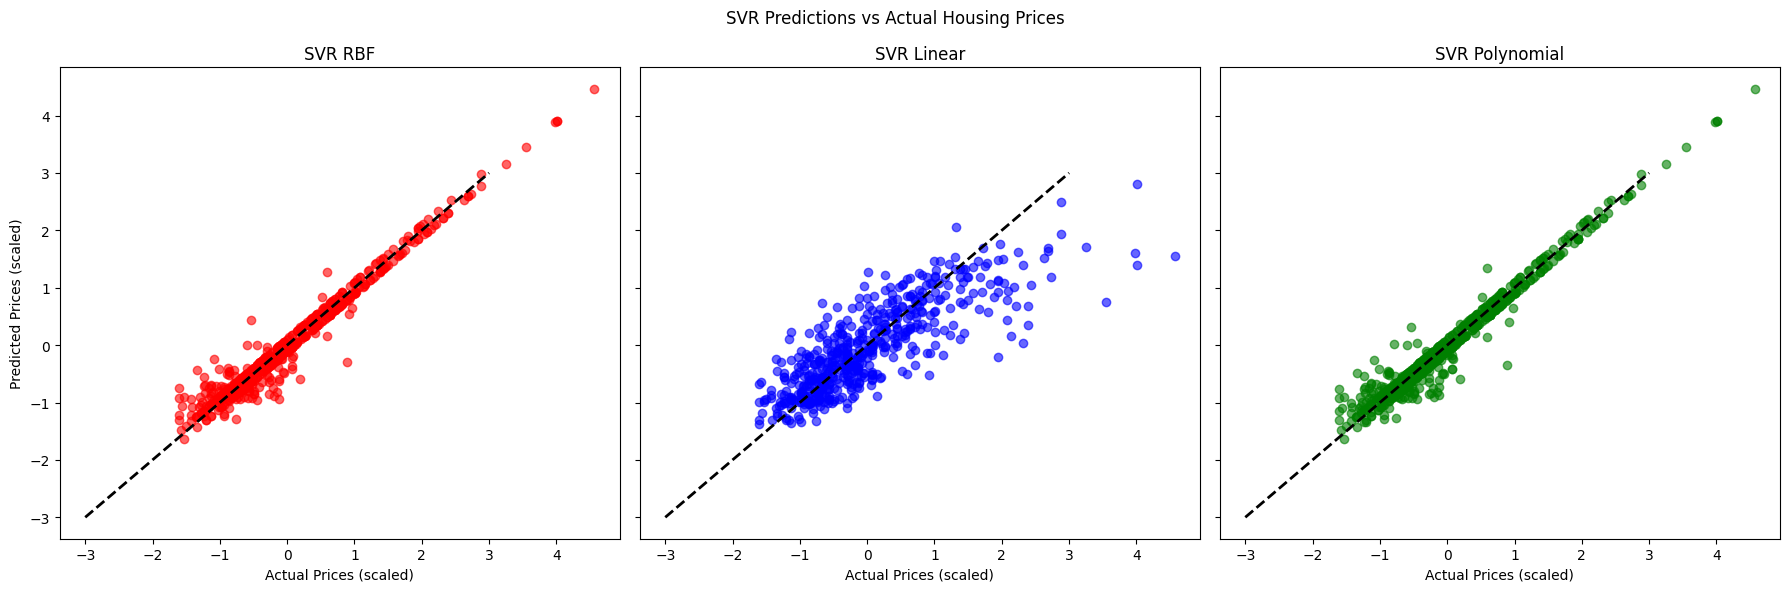

In [143]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# RBF subplot
axes[0].scatter(yh_scaled, y_rbf, color='red', alpha=0.6)
axes[0].plot([-3, 3], [-3, 3], 'k--', lw=2)
axes[0].set_title('SVR RBF')
axes[0].set_xlabel('Actual Prices (scaled)')
axes[0].set_ylabel('Predicted Prices (scaled)')

# Linear subplot
axes[1].scatter(yh_scaled, y_lin, color='blue', alpha=0.6)
axes[1].plot([-3, 3], [-3, 3], 'k--', lw=2)
axes[1].set_title('SVR Linear')
axes[1].set_xlabel('Actual Prices (scaled)')

# Polynomial subplot
axes[2].scatter(yh_scaled, y_poly, color='green', alpha=0.6)
axes[2].plot([-3, 3], [-3, 3], 'k--', lw=2)
axes[2].set_title('SVR Polynomial')
axes[2].set_xlabel('Actual Prices (scaled)')

plt.suptitle('SVR Predictions vs Actual Housing Prices')
plt.tight_layout()
plt.show()

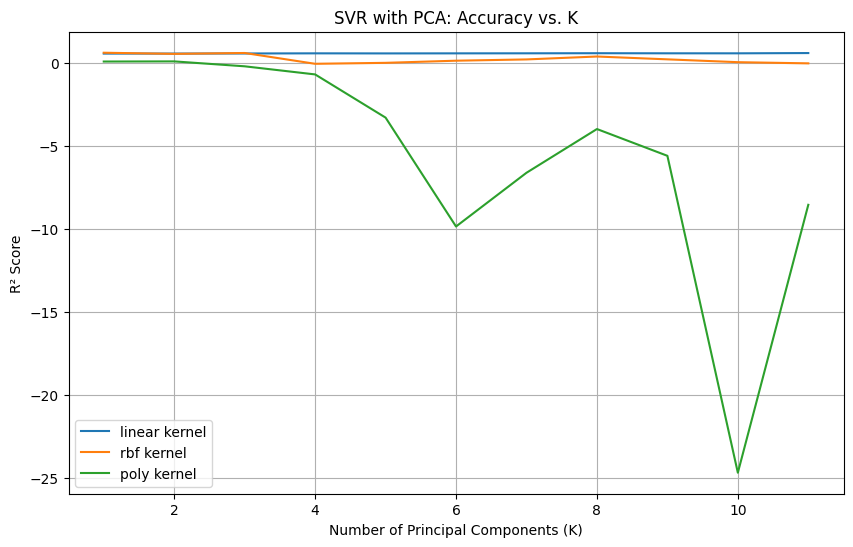

Optimal K values: {'linear': np.int64(11), 'rbf': np.int64(1), 'poly': np.int64(2)}


In [149]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_housing)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_housing.values.reshape(-1, 1)).ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Try PCA with different number of components
max_components = X_scaled.shape[1]
kernels = ['linear', 'rbf', 'poly']
results = {kernel: [] for kernel in kernels}

for k in range(1, max_components + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # SVR models
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=4)

    y_rbf = svr_rbf.fit(X_train_pca, y_train).predict(X_test_pca)
    y_lin = svr_lin.fit(X_train_pca, y_train).predict(X_test_pca)
    y_poly = svr_poly.fit(X_train_pca, y_train).predict(X_test_pca)

    results['rbf'].append(r2_score(y_test, y_rbf))
    results['linear'].append(r2_score(y_test, y_lin))
    results['poly'].append(r2_score(y_test, y_poly))

# Plot accuracy vs number of PCA components
plt.figure(figsize=(10, 6))
for kernel in kernels:
    plt.plot(range(1, max_components + 1), results[kernel], label=f'{kernel} kernel')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('R² Score')
plt.title('SVR with PCA: Accuracy vs. K')
plt.legend()
plt.grid(True)
plt.show()

# Best K for each kernel
optimal_k = {kernel: np.argmax(results[kernel]) + 1 for kernel in kernels}
print("Optimal K values:", optimal_k)